In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
spotify_songs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

**Analyse de la durée**

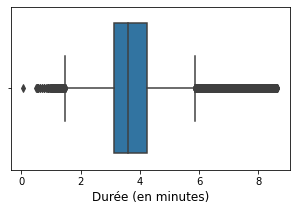

In [ ]:
plt.figure(figsize = ( 5 , 3 )) 
  
sns.boxplot( x = spotify_songs.duration_ms / 60000 ) 
  
plt.xlabel( "Durée (en minutes)" , size = 12 ) 
      
plt.show() 

On se rend compte qu'il y a des valeurs aberantes donc on va les supprimer pour nettoyer notre jeu de données

In [ ]:
Q1 = np.percentile(spotify_songs.duration_ms, 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(spotify_songs.duration_ms, 75,
                   interpolation = 'midpoint')

IQR = Q3 - Q1


In [ ]:
(Q3+1.5*IQR) / 60000

5.870566666666667

In [ ]:
(Q1-1.5*IQR) / 60000

1.4861666666666666

Nous allons alors retirer les pistes de moins de 1mn30 et plus de 6 mn (environ)

In [ ]:
mask = (spotify_songs.duration_ms < (Q3+1.5*IQR))
mask2 = spotify_songs.duration_ms > (Q1-1.5*IQR)
spotify_data_cleaned = spotify_songs.loc[mask]
spotify_data_cleaned = spotify_data_cleaned.loc[mask2]
spotify_data_cleaned.shape

(31446, 23)

**Étude de la popularité d'une piste**

<AxesSubplot:xlabel='track_popularity', ylabel='Count'>

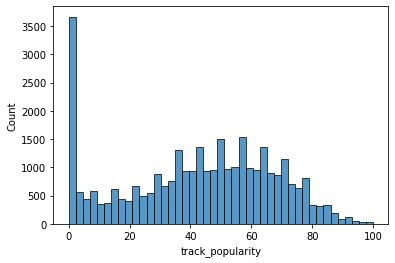

In [ ]:
sns.histplot(x=spotify_songs.track_popularity)

On se rend compte qu'il y a beaucoup de valeurs proches de 0, on peut regarder si la date influe sur la popularité

Pour cela il faut rendre la colonne release date exploitable, on va la séparer en deux nouvelles colonnes : release_year et release_month. Ici on utilisera "year" mais month pourra être utilisé plus tard (imaginons qu'une chanson sortie l'été est plus dansable par exemple)

In [ ]:
spotify_data_cleaned.track_album_release_date.str[:4]
spotify_data_cleaned.track_album_release_date.str[5:7]
spotify_data_cleaned = spotify_data_cleaned.assign(
    release_month = spotify_data_cleaned.track_album_release_date.str[5:7],
    release_year = spotify_data_cleaned.track_album_release_date.str[:4],
)
spotify_data_cleaned.drop(columns="track_album_release_date",inplace=True)

In [ ]:
spotify_data_cleaned.release_year = spotify_data_cleaned.release_year.astype("int64")

In [ ]:
spotify_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31446 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           31446 non-null  object 
 1   track_name         31441 non-null  object 
 2   track_artist       31441 non-null  object 
 3   track_popularity   31446 non-null  int64  
 4   track_album_id     31446 non-null  object 
 5   track_album_name   31441 non-null  object 
 6   playlist_name      31446 non-null  object 
 7   playlist_id        31446 non-null  object 
 8   playlist_genre     31446 non-null  object 
 9   playlist_subgenre  31446 non-null  object 
 10  danceability       31446 non-null  float64
 11  energy             31446 non-null  float64
 12  key                31446 non-null  int64  
 13  loudness           31446 non-null  float64
 14  mode               31446 non-null  int64  
 15  speechiness        31446 non-null  float64
 16  acousticness       314

In [ ]:
mask = (spotify_data_cleaned.release_year>2000)
recent_songs = spotify_data_cleaned.loc[mask]

In [ ]:
mask = (spotify_data_cleaned.track_popularity == 0)
songs_with_0_popularity = spotify_data_cleaned.loc[mask]

<AxesSubplot:xlabel='release_year', ylabel='Count'>

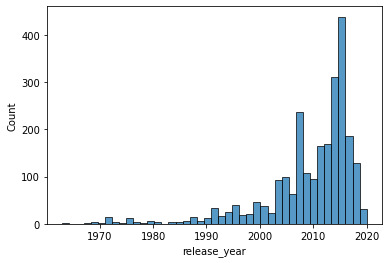

In [ ]:
sns.histplot(x=songs_with_0_popularity.release_year)

On peut pas trop en conclure grand chose en fait.. si jamais il y a peu de vieilles chansons

In [ ]:
songs_with_0_popularity

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_month,release_year
476,1gsb4CFzUMERAkfzAKwrZu,Siren,SUNMI,0,75eIP5pPvtQCB0bAz2TEsU,WARNING,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,pop,dance pop,...,0,0.0385,0.011900,0.000000,0.0887,0.545,122.051,197252,09,2018
772,4yEXem27DzCg8xytvvO3E9,Lollipop (Candyman),Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,...,0,0.0310,0.031700,0.007400,0.1710,0.861,139.047,215053,01,2009
801,7vHkU1H73z5NVbGTIyI1DG,Around The World,Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,...,1,0.0312,0.003320,0.000182,0.5370,0.969,129.934,209120,01,2009
883,3decfgk2pFkvCzYUFj6ssf,I'm Yours,Influencers Worship,0,2FQCn5R6hSDeGYgUCW5kN9,I'm Yours,Christian Dance Party,37i9dQZF1DWUUPO0Sbx2CM,pop,dance pop,...,0,0.0557,0.000186,0.000994,0.1690,0.357,127.995,205280,07,2018
934,5KHbu2Go6NBryS0h0TpTNJ,Talk About It,Bancali,0,5aBI1WNIur9niQ5dM6xnVB,Talk About It,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,dance pop,...,0,0.2230,0.508000,0.000521,0.4190,0.318,110.024,248727,01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32800,5yl2YyDgcpERTZoZHD9Etl,Dynamite,Gareth Emery,0,3Zm13AWIMBpJbwFzenqy9V,Drive,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,1,0.0312,0.011100,0.656000,0.0991,0.314,127.986,292284,04,2014
32810,0ZAPuWOQiiY0nGbLPlozT8,Lights & Thunder - Club Mix,Gareth Emery,0,6yHi6saMH67HPD59a6arK1,Lights & Thunder,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0,0.0430,0.001980,0.019700,0.5340,0.171,128.004,313877,03,2014
32813,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,Borgeous,0,3NArAQULJ5BMoR8YY5UdWA,Invincible,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0,0.0409,0.006780,0.000000,0.0677,0.391,127.906,204609,02,2014
32821,3fgNmvYq0QU5aFHDUMa4cm,Unleash (Life In Color Anthem 2014) - Original...,Adventure Club,0,4qzYTF7mwcWMbEFdw5qcHB,Unleash,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0,0.0547,0.004440,0.000041,0.0433,0.342,127.979,331000,04,2014


In [ ]:
mask = (spotify_data_cleaned.track_popularity > 0)
spotify_data_cleaned = spotify_data_cleaned.loc[mask]
spotify_data_cleaned.shape

(28953, 24)

Regarder si lien entre les variables

<AxesSubplot:>

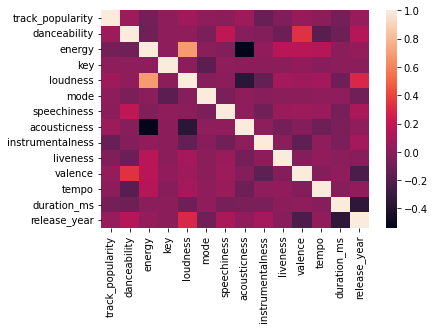

In [ ]:
sns.heatmap(spotify_data_cleaned.corr())

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

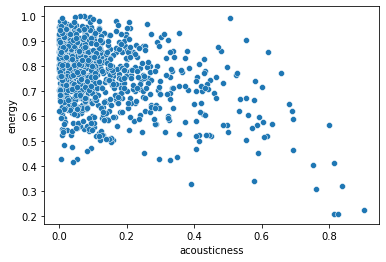

In [ ]:
sns.scatterplot(x=spotify_data_cleaned.acousticness[:1000],y=spotify_data_cleaned.energy[:1000])

<AxesSubplot:xlabel='loudness', ylabel='energy'>

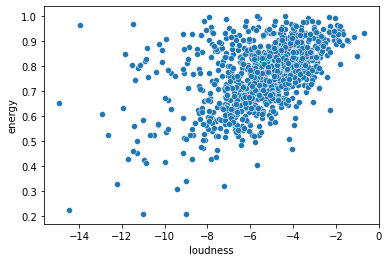

In [ ]:
sns.scatterplot(x=spotify_data_cleaned.loudness[:1000],y=spotify_data_cleaned.energy[:1000])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2ad4461-7f35-42f5-b2d9-f686e8952f67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>